In [1]:
import numpy as np
import torch
# from arsf_envi_reader import envi_header
import shutil
import os
import json
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr
from scipy.optimize import curve_fit
# from tqdm import tqdm
# import multiprocess as mp
from scipy import ndimage
from numpy import trapz
# import cupy as cp
from scipy import ndimage
import torch.nn.functional as F

In [7]:
import torch
print(torch.__version__)


1.13.0


In [6]:
pip install --upgrade torch==1.9.0 torchvision==0.10.0


     ------------------------------------- 222.0/222.0 MB 13.9 MB/s eta 0:00:00
     ------------------------------------- 920.7/920.7 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0
    Uninstalling torchvision-0.14.0:
      Successfully uninstalled torchvision-0.14.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.13.0 requires torch==1.13.0, but you have torch 1.9.0 which is incompatible.


In [8]:
pip install --upgrade torchaudio


     ---------------------------------------- 2.1/2.1 MB 19.4 MB/s eta 0:00:00
     ------------------------------------- 172.4/172.4 MB 16.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 26.4 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 26.2 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 35.1 MB/s eta 0:00:00

  Attempting uninstall: torch
    Found existing installation: torch 1.9.0
    Uninstalling torch-1.9.0:
      Successfully uninstalled torch-1.9.0
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.0
    Uninstalling torchaudio-0.13.0:
      Successfully uninstalled torchaudio-0.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0 requires torch==1.9.0, but you have torch 2.0.1 which is incompatible.


In [2]:
torch.cuda.is_available()

True

In [3]:
high_res_img = gdal.Open(r'D:\wenqu\mosaic\site2a\site2a_simulation_mosaic')
high_res_radiance = gdal.Open(r'D:\wenqu\mosaic\site2a\site2a_simulation_mosaic').ReadAsArray() 
# high_res_radiance_torch = torch.from_numpy(high_res_radiance).float().to(device)
high_res_radiance.shape

(122, 5218, 5519)

In [7]:
# high_res_radiance_torch.shape

In [4]:
# Convert the band to a tensor on the GPU
b119 = high_res_radiance[118, :, :]
b42_tensor = torch.from_numpy(b119).unsqueeze(0).unsqueeze(0).to('cuda')

# Define the size of the filter window
filter_size = 11

# Pad the tensor to handle border cases
pad_size = (filter_size - 1) // 2
padded_tensor = F.pad(b42_tensor, (pad_size, pad_size, pad_size, pad_size), value=float('nan'))

# Apply the generic filter using unfold and conv2d
unfolded = F.unfold(padded_tensor, kernel_size=filter_size).squeeze()
std_values = torch.nanstd(unfolded, dim=1)

# Remove the padding from the std values
b42_std = std_values.view(b42.shape[0], b42.shape[1]).cpu().numpy()

AttributeError: module 'torch' has no attribute 'nanstd'

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

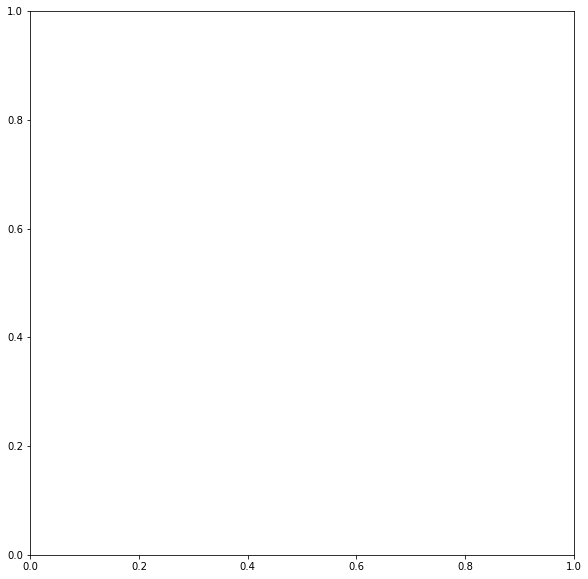

In [10]:
fig = plt.figure(figsize = (10,10))
plt.imshow(high_res_radiance_torch[121,:,:], interpolation='nearest')
plt.show()

In [ ]:
b119 = high_res_radiance[118, :, :]
b119_std = ndimage.generic_filter(b119, np.nanstd, size=(11,11), mode='constant', cval=np.NaN)


In [6]:
b119_std.shape

(9106, 8882)

In [7]:
b107 = high_res_radiance[106, :, :]
b107_std = ndimage.generic_filter(b107, np.nanstd, size=11, mode='constant', cval=np.NaN)


In [8]:
b117 = high_res_radiance[116, :, :]
b117_std = ndimage.generic_filter(b117, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [9]:
b108 = high_res_radiance[107, :, :]
b108_std = ndimage.generic_filter(b108, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [10]:
b17 = high_res_radiance[16, :, :]
b17_std = ndimage.generic_filter(b17, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [11]:
b122 = high_res_radiance[121, :, :]
b122_mean = ndimage.generic_filter(b122, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [12]:
b97 = high_res_radiance[96, :, :]
b97_std = ndimage.generic_filter(b97, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [13]:
b9 = high_res_radiance[8, :, :]
b9_std = ndimage.generic_filter(b9, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b46 = high_res_radiance[45, :, :]
b46_std = ndimage.generic_filter(b46, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b110 = high_res_radiance[109, :, :]
b110_mean = ndimage.generic_filter(b110, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [ ]:
b15 = high_res_radiance[14, :, :]
b15_std = ndimage.generic_filter(b15, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b42 = high_res_radiance[41, :, :]
b42_std = ndimage.generic_filter(b42, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b37 = high_res_radiance[36, :, :]
b37_std = ndimage.generic_filter(b37, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b113 = high_res_radiance[112, :, :]
b113_std = ndimage.generic_filter(b113, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b111 = high_res_radiance[110, :, :]
b111_std = ndimage.generic_filter(b111, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b86 = high_res_radiance[85, :, :]
b86_std = ndimage.generic_filter(b86, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b6 = high_res_radiance[5, :, :]
b6_mean = ndimage.generic_filter(b6, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [ ]:
b10 = high_res_radiance[9, :, :]
b10_mean = ndimage.generic_filter(b10, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [ ]:
b20 = high_res_radiance[19, :, :]
b20_mean = ndimage.generic_filter(b20, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [ ]:
b114 = high_res_radiance[113, :, :]
b114_mean = ndimage.generic_filter(b114, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [ ]:
b113 = high_res_radiance[112, :, :]
b113_mean = ndimage.generic_filter(b113, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [ ]:
b48 = high_res_radiance[47, :, :]
b48_mean = ndimage.generic_filter(b48, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [ ]:
b6 = high_res_radiance[5, :, :]
b6_std = ndimage.generic_filter(b6, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b91 = high_res_radiance[90, :, :]
b91_std = ndimage.generic_filter(b91, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b39 = high_res_radiance[38, :, :]
b39_std = ndimage.generic_filter(b39, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
b23 = high_res_radiance[22, :, :]
b23_std = ndimage.generic_filter(b23, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [ ]:
site6_logpc_traitmap = (-0.11896496*b119_std,  
                      +0.10664171*b107_std, 
                      -0.086348*b117_std,  
                      +0.07304101*b108_std, 
                      -0.07094559*b17_std,
                      +0.06625993*b122_mean, 
                      -0.06341419*b97_std, 
                      -0.06157008*b9_std, 
                      -0.06129507*b46_std, 
                      -0.05904957*b110_mean,
                      +0.05886772*b15_std, 
                      -0.05829401*b42_std,  
                      +0.05618142*b37_std,  
                      +0.05422837*b113_std,  
                      +0.0535395*b111_std,
                      +0.05329481*b86_std,  
                      +0.05109891*b6_mean, 
                      -0.04969719*b10_mean,  
                      +0.04969354*b20_mean,  
                      +0.04917988*b114_mean,
                      +0.04828722*b113_mean, 
                      -0.04732767*b48_mean,  
                      +0.04654021*b6_std, 
                      -0.04487358*b91_std,  
                      +0.04483862*b39_std,
                      +0.04398*b23_std)

In [ ]:
pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize

In [ ]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site6_logpc_trait_map.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)

In [ ]:
out_ds.GetRasterBand(1).WriteArray(site6_logpc_traitmap)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds